# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [4]:
# H0 (answer in words):

H0: Low levels of masculinity in male characters have no affect on fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


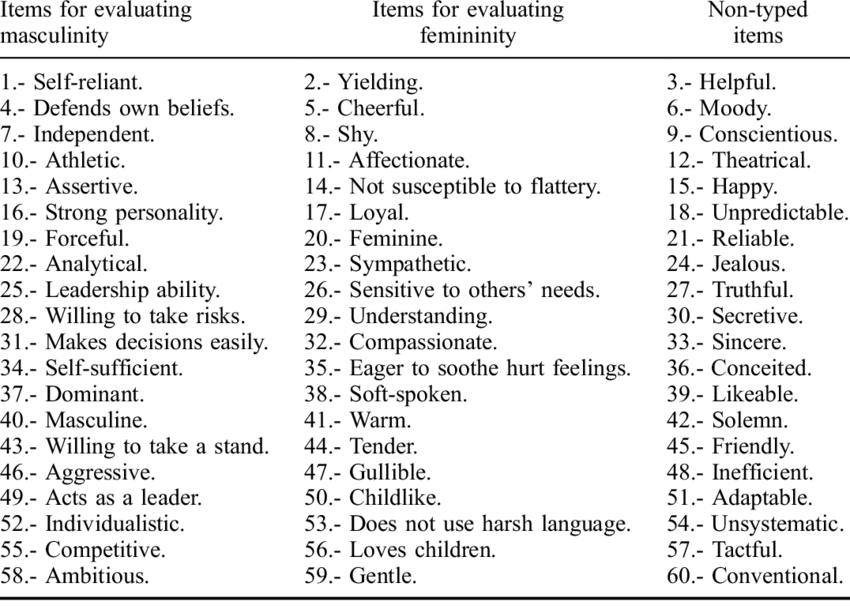

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [5]:
!pip install -U spacy-experimental

In [6]:
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [7]:
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 6.3 MB/s eta 0:00:0000:0100:01


In [8]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en-core-web-sm-3.7.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
%cd riveter-nlp/riveter

/Users/miriamweigand/Desktop/Analysing Data/A2_Analysing_Data/riveter-nlp/riveter


In [10]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [11]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [12]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [24]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    
    riveter.train(segments, text_ids, persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'} )

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:04<06:45,  4.55s/it]

2024-03-08 14:52:15 Complete!
Story ID: 4706144, Masculine Power Score: 0.09090909090909091



Processing stories:   2%|▏         | 2/90 [00:08<05:51,  4.00s/it]

2024-03-08 14:52:19 Complete!
Story ID: 4752980, Masculine Power Score: 0.25



Processing stories:   3%|▎         | 3/90 [00:11<05:16,  3.63s/it]

2024-03-08 14:52:22 Complete!
Story ID: 4621698, Masculine Power Score: 0.5714285714285714



Processing stories:   4%|▍         | 4/90 [00:14<05:10,  3.61s/it]

2024-03-08 14:52:25 Complete!
Story ID: 3651108, Masculine Power Score: 0.11764705882352941



Processing stories:   6%|▌         | 5/90 [00:18<05:13,  3.68s/it]

2024-03-08 14:52:29 Complete!
Story ID: 5282729, Masculine Power Score: 0.2



Processing stories:   7%|▋         | 6/90 [00:22<05:10,  3.69s/it]

2024-03-08 14:52:33 Complete!
Story ID: 5533886, Masculine Power Score: 0.0



Processing stories:   8%|▊         | 7/90 [00:26<05:12,  3.76s/it]

2024-03-08 14:52:37 Complete!
Story ID: 4547622, Masculine Power Score: 0.05714285714285714



Processing stories:   9%|▉         | 8/90 [00:29<04:54,  3.59s/it]

2024-03-08 14:52:40 Complete!
Story ID: 16177508, Masculine Power Score: 0.13333333333333333



Processing stories:  10%|█         | 9/90 [00:33<04:53,  3.62s/it]

2024-03-08 14:52:44 Complete!
Story ID: 15745185, Masculine Power Score: -0.10526315789473684



 33%|███▎      | 1/3 [00:01<00:03,  1.84s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [00:37<04:53,  3.67s/it]

2024-03-08 14:52:48 Complete!
Story ID: 15654528, Masculine Power Score: 0.18604651162790697



Processing stories:  12%|█▏        | 11/90 [00:40<04:45,  3.62s/it]

2024-03-08 14:52:51 Complete!
Story ID: 7448155, Masculine Power Score: 0.325



Processing stories:  13%|█▎        | 12/90 [00:44<04:47,  3.69s/it]

2024-03-08 14:52:55 Complete!
Story ID: 4983847, Masculine Power Score: 0.10344827586206896



Processing stories:  14%|█▍        | 13/90 [00:48<04:45,  3.71s/it]

2024-03-08 14:52:59 Complete!
Story ID: 3313118, Masculine Power Score: -0.23333333333333334



Processing stories:  16%|█▌        | 14/90 [00:51<04:40,  3.69s/it]

2024-03-08 14:53:02 Complete!
Story ID: 3290390, Masculine Power Score: -0.10638297872340426



Processing stories:  17%|█▋        | 15/90 [00:56<04:56,  3.95s/it]

2024-03-08 14:53:07 Complete!
Story ID: 36435301, Masculine Power Score: 0.05555555555555555



Processing stories:  18%|█▊        | 16/90 [01:00<04:50,  3.92s/it]

2024-03-08 14:53:11 Complete!
Story ID: 36575491, Masculine Power Score: 0.2631578947368421



Processing stories:  19%|█▉        | 17/90 [01:03<04:40,  3.84s/it]

2024-03-08 14:53:14 Complete!
Story ID: 35225224, Masculine Power Score: 0.24324324324324326



Processing stories:  20%|██        | 18/90 [01:07<04:36,  3.85s/it]

2024-03-08 14:53:18 Complete!
Story ID: 4594527, Masculine Power Score: 0.2222222222222222



Processing stories:  21%|██        | 19/90 [01:10<04:18,  3.64s/it]

2024-03-08 14:53:21 Complete!
Story ID: 5485625, Masculine Power Score: 0.10909090909090909



Processing stories:  22%|██▏       | 20/90 [01:14<04:12,  3.61s/it]

2024-03-08 14:53:25 Complete!
Story ID: 36408319, Masculine Power Score: 0.15789473684210525



Processing stories:  23%|██▎       | 21/90 [01:18<04:19,  3.76s/it]

2024-03-08 14:53:29 Complete!
Story ID: 35762659, Masculine Power Score: 0.21428571428571427



Processing stories:  24%|██▍       | 22/90 [01:22<04:16,  3.77s/it]

2024-03-08 14:53:33 Complete!
Story ID: 35603194, Masculine Power Score: 0.3684210526315789



Processing stories:  26%|██▌       | 23/90 [01:26<04:10,  3.74s/it]

2024-03-08 14:53:37 Complete!
Story ID: 35344306, Masculine Power Score: 0.1388888888888889



Processing stories:  27%|██▋       | 24/90 [01:29<03:53,  3.54s/it]

2024-03-08 14:53:40 Complete!
Story ID: 36695155, Masculine Power Score: 0.1



Processing stories:  28%|██▊       | 25/90 [01:32<03:53,  3.59s/it]

2024-03-08 14:53:43 Complete!
Story ID: 36064474, Masculine Power Score: 0.1



Processing stories:  29%|██▉       | 26/90 [01:36<03:51,  3.61s/it]

2024-03-08 14:53:47 Complete!
Story ID: 36024820, Masculine Power Score: 0.16666666666666666



Processing stories:  30%|███       | 27/90 [01:40<03:59,  3.81s/it]

2024-03-08 14:53:51 Complete!
Story ID: 35182330, Masculine Power Score: 0.06818181818181818



Processing stories:  31%|███       | 28/90 [01:44<03:59,  3.87s/it]

2024-03-08 14:53:55 Complete!
Story ID: 36567496, Masculine Power Score: 0.21052631578947367



Processing stories:  32%|███▏      | 29/90 [01:48<03:54,  3.84s/it]

2024-03-08 14:53:59 Complete!
Story ID: 35560330, Masculine Power Score: 0.13333333333333333



Processing stories:  33%|███▎      | 30/90 [01:52<03:54,  3.91s/it]

2024-03-08 14:54:03 Complete!
Story ID: 35877496, Masculine Power Score: 0.125



Processing stories:  34%|███▍      | 31/90 [01:56<03:53,  3.96s/it]

2024-03-08 14:54:07 Complete!
Story ID: 35957410, Masculine Power Score: 0.2857142857142857



Processing stories:  36%|███▌      | 32/90 [02:00<03:45,  3.89s/it]

2024-03-08 14:54:11 Complete!
Story ID: 30947654, Masculine Power Score: 0.04



Processing stories:  37%|███▋      | 33/90 [02:04<03:43,  3.92s/it]

2024-03-08 14:54:15 Complete!
Story ID: 36332707, Masculine Power Score: -0.09523809523809523



Processing stories:  38%|███▊      | 34/90 [02:08<03:44,  4.01s/it]

2024-03-08 14:54:19 Complete!
Story ID: 35967940, Masculine Power Score: 0.16071428571428573



Processing stories:  39%|███▉      | 35/90 [02:12<03:39,  4.00s/it]

2024-03-08 14:54:23 Complete!
Story ID: 35001073, Masculine Power Score: 0.05



Processing stories:  40%|████      | 36/90 [02:16<03:35,  3.99s/it]

2024-03-08 14:54:27 Complete!
Story ID: 35138911, Masculine Power Score: 0.1388888888888889



Processing stories:  41%|████      | 37/90 [02:19<03:20,  3.79s/it]

2024-03-08 14:54:30 Complete!
Story ID: 35280397, Masculine Power Score: 0.22727272727272727



Processing stories:  42%|████▏     | 38/90 [02:24<03:23,  3.92s/it]

2024-03-08 14:54:35 Complete!
Story ID: 36049939, Masculine Power Score: 0.2708333333333333



Processing stories:  43%|████▎     | 39/90 [02:28<03:23,  3.98s/it]

2024-03-08 14:54:39 Complete!
Story ID: 34995673, Masculine Power Score: 0.16363636363636364



Processing stories:  44%|████▍     | 40/90 [02:32<03:25,  4.10s/it]

2024-03-08 14:54:43 Complete!
Story ID: 33477346, Masculine Power Score: 0.43333333333333335



Processing stories:  46%|████▌     | 41/90 [02:35<03:10,  3.89s/it]

2024-03-08 14:54:46 Complete!
Story ID: 36840832, Masculine Power Score: -0.23076923076923078



Processing stories:  47%|████▋     | 42/90 [02:39<02:56,  3.68s/it]

2024-03-08 14:54:50 Complete!
Story ID: 30896276, Masculine Power Score: 0.14285714285714285



Processing stories:  48%|████▊     | 43/90 [02:42<02:47,  3.57s/it]

2024-03-08 14:54:53 Complete!
Story ID: 37363471, Masculine Power Score: 0.42857142857142855



Processing stories:  49%|████▉     | 44/90 [02:45<02:43,  3.55s/it]

2024-03-08 14:54:56 Complete!
Story ID: 36984901, Masculine Power Score: 0.0



Processing stories:  50%|█████     | 45/90 [02:49<02:39,  3.55s/it]

2024-03-08 14:55:00 Complete!
Story ID: 33353644, Masculine Power Score: -0.05660377358490566



Processing stories:  51%|█████     | 46/90 [02:53<02:37,  3.57s/it]

2024-03-08 14:55:04 Complete!
Story ID: 37002835, Masculine Power Score: -0.14285714285714285



Processing stories:  52%|█████▏    | 47/90 [02:57<02:39,  3.72s/it]

2024-03-08 14:55:08 Complete!
Story ID: 5630824, Masculine Power Score: 0.3157894736842105



Processing stories:  53%|█████▎    | 48/90 [03:01<02:40,  3.83s/it]

2024-03-08 14:55:12 Complete!
Story ID: 10053617, Masculine Power Score: 0.25806451612903225



Processing stories:  54%|█████▍    | 49/90 [03:04<02:34,  3.76s/it]

2024-03-08 14:55:15 Complete!
Story ID: 1572659, Masculine Power Score: 0.23333333333333334



Processing stories:  56%|█████▌    | 50/90 [03:08<02:32,  3.80s/it]

2024-03-08 14:55:19 Complete!
Story ID: 7450573, Masculine Power Score: 0.1



Processing stories:  57%|█████▋    | 51/90 [03:12<02:29,  3.84s/it]

2024-03-08 14:55:23 Complete!
Story ID: 6918676, Masculine Power Score: 0.05263157894736842



Processing stories:  58%|█████▊    | 52/90 [03:17<02:32,  4.01s/it]

2024-03-08 14:55:28 Complete!
Story ID: 6075402, Masculine Power Score: 0.36363636363636365



Processing stories:  59%|█████▉    | 53/90 [03:21<02:30,  4.06s/it]

2024-03-08 14:55:32 Complete!
Story ID: 11101779, Masculine Power Score: 0.3333333333333333



Processing stories:  60%|██████    | 54/90 [03:25<02:29,  4.16s/it]

2024-03-08 14:55:36 Complete!
Story ID: 11321331, Masculine Power Score: 0.08108108108108109



Processing stories:  61%|██████    | 55/90 [03:29<02:19,  3.99s/it]

2024-03-08 14:55:40 Complete!
Story ID: 12284853, Masculine Power Score: 0.022222222222222223



Processing stories:  62%|██████▏   | 56/90 [03:32<02:11,  3.85s/it]

2024-03-08 14:55:43 Complete!
Story ID: 12282003, Masculine Power Score: 0.08888888888888889



Processing stories:  63%|██████▎   | 57/90 [03:36<02:01,  3.67s/it]

2024-03-08 14:55:47 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [03:39<01:54,  3.59s/it]

2024-03-08 14:55:50 Complete!
Story ID: 4228053, Masculine Power Score: 0.21739130434782608



Processing stories:  66%|██████▌   | 59/90 [03:43<01:53,  3.66s/it]

2024-03-08 14:55:54 Complete!
Story ID: 12127317, Masculine Power Score: 0.13513513513513514



Processing stories:  67%|██████▋   | 60/90 [03:46<01:46,  3.55s/it]

2024-03-08 14:55:57 Complete!
Story ID: 12010134, Masculine Power Score: 0.21739130434782608



Processing stories:  68%|██████▊   | 61/90 [03:50<01:47,  3.70s/it]

2024-03-08 14:56:01 Complete!
Story ID: 11510919, Masculine Power Score: 0.4230769230769231



Processing stories:  69%|██████▉   | 62/90 [03:54<01:44,  3.75s/it]

2024-03-08 14:56:05 Complete!
Story ID: 8145802, Masculine Power Score: 0.22727272727272727



Processing stories:  70%|███████   | 63/90 [03:58<01:40,  3.71s/it]

2024-03-08 14:56:09 Complete!
Story ID: 6637942, Masculine Power Score: -0.13043478260869565



Processing stories:  71%|███████   | 64/90 [04:01<01:35,  3.68s/it]

2024-03-08 14:56:12 Complete!
Story ID: 7427905, Masculine Power Score: -0.02702702702702703



Processing stories:  72%|███████▏  | 65/90 [04:05<01:31,  3.67s/it]

2024-03-08 14:56:16 Complete!
Story ID: 3893857, Masculine Power Score: 0.1206896551724138



Processing stories:  73%|███████▎  | 66/90 [04:08<01:27,  3.63s/it]

2024-03-08 14:56:19 Complete!
Story ID: 33040258, Masculine Power Score: 0.25



Processing stories:  74%|███████▍  | 67/90 [04:12<01:24,  3.69s/it]

2024-03-08 14:56:23 Complete!
Story ID: 33858850, Masculine Power Score: -0.16666666666666666



Processing stories:  76%|███████▌  | 68/90 [04:16<01:22,  3.73s/it]

2024-03-08 14:56:27 Complete!
Story ID: 2775776, Masculine Power Score: 0.25



Processing stories:  77%|███████▋  | 69/90 [04:20<01:18,  3.74s/it]

2024-03-08 14:56:31 Complete!
Story ID: 3197963, Masculine Power Score: 0.3



Processing stories:  78%|███████▊  | 70/90 [04:23<01:14,  3.70s/it]

2024-03-08 14:56:34 Complete!
Story ID: 12395199, Masculine Power Score: 0.14634146341463414



Processing stories:  79%|███████▉  | 71/90 [04:27<01:08,  3.60s/it]

2024-03-08 14:56:38 Complete!
Story ID: 10934010, Masculine Power Score: 0.2962962962962963



Processing stories:  80%|████████  | 72/90 [04:30<01:02,  3.50s/it]

2024-03-08 14:56:41 Complete!
Story ID: 12301116, Masculine Power Score: 0.034482758620689655



Processing stories:  81%|████████  | 73/90 [04:34<01:00,  3.55s/it]

2024-03-08 14:56:45 Complete!
Story ID: 12706317, Masculine Power Score: -0.08695652173913043



Processing stories:  82%|████████▏ | 74/90 [04:38<00:58,  3.67s/it]

2024-03-08 14:56:49 Complete!
Story ID: 11499468, Masculine Power Score: 0.06896551724137931



Processing stories:  83%|████████▎ | 75/90 [04:41<00:53,  3.56s/it]

2024-03-08 14:56:52 Complete!
Story ID: 12184146, Masculine Power Score: 0.32



Processing stories:  84%|████████▍ | 76/90 [04:44<00:49,  3.51s/it]

2024-03-08 14:56:55 Complete!
Story ID: 12201333, Masculine Power Score: 0.12



Processing stories:  86%|████████▌ | 77/90 [04:48<00:47,  3.68s/it]

2024-03-08 14:56:59 Complete!
Story ID: 11496030, Masculine Power Score: 0.16



Processing stories:  87%|████████▋ | 78/90 [04:52<00:44,  3.70s/it]

2024-03-08 14:57:03 Complete!
Story ID: 11510277, Masculine Power Score: 0.16216216216216217



Processing stories:  88%|████████▊ | 79/90 [04:57<00:43,  3.94s/it]

2024-03-08 14:57:08 Complete!
Story ID: 10772274, Masculine Power Score: 0.3793103448275862



Processing stories:  89%|████████▉ | 80/90 [05:01<00:39,  3.92s/it]

2024-03-08 14:57:12 Complete!
Story ID: 12646050, Masculine Power Score: 0.041666666666666664



Processing stories:  90%|█████████ | 81/90 [05:04<00:34,  3.81s/it]

2024-03-08 14:57:15 Complete!
Story ID: 11161479, Masculine Power Score: -0.013157894736842105



Processing stories:  91%|█████████ | 82/90 [05:08<00:30,  3.76s/it]

2024-03-08 14:57:19 Complete!
Story ID: 12069936, Masculine Power Score: 0.061224489795918366



Processing stories:  92%|█████████▏| 83/90 [05:12<00:26,  3.75s/it]

2024-03-08 14:57:23 Complete!
Story ID: 12285972, Masculine Power Score: 0.41935483870967744



Processing stories:  93%|█████████▎| 84/90 [05:15<00:21,  3.65s/it]

2024-03-08 14:57:26 Complete!
Story ID: 12372702, Masculine Power Score: -0.03571428571428571



Processing stories:  94%|█████████▍| 85/90 [05:19<00:18,  3.67s/it]

2024-03-08 14:57:30 Complete!
Story ID: 12610496, Masculine Power Score: 0.1



Processing stories:  96%|█████████▌| 86/90 [05:23<00:14,  3.72s/it]

2024-03-08 14:57:34 Complete!
Story ID: 10970472, Masculine Power Score: 0.06060606060606061



Processing stories:  97%|█████████▋| 87/90 [05:26<00:10,  3.58s/it]

2024-03-08 14:57:37 Complete!
Story ID: 12084552, Masculine Power Score: 0.3157894736842105



Processing stories:  98%|█████████▊| 88/90 [05:30<00:07,  3.74s/it]

2024-03-08 14:57:41 Complete!
Story ID: 12727119, Masculine Power Score: 0.017543859649122806



Processing stories:  99%|█████████▉| 89/90 [05:33<00:03,  3.63s/it]

2024-03-08 14:57:44 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [05:37<00:00,  3.75s/it]

2024-03-08 14:57:48 Complete!
Story ID: 10859508, Masculine Power Score: 0.24324324324324326


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [25]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000


##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [27]:
!pip install lexicalrichness

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for textblob>=0.15.3 from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.0 MB/s eta 0:00:00ta 0:00:01
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=938da5cea8388dcb53cf7fb76bab800baa744c8c44192edefbed825f506bb7d6
  Stored in directory: /Users/miriamweigand/Library/Caches/pip/wheels/bb

In [28]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>]], dtype=object)

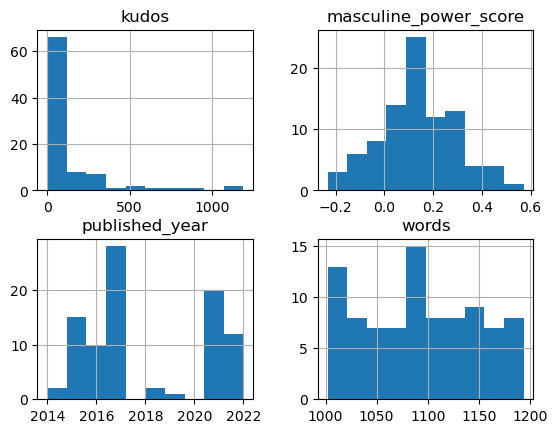

In [31]:
# Q3a (code): Check data distribution
df[['kudos', 'masculine_power_score','published_year','words']].hist()

In [32]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.139553,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.155706,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.233333,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.050658,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.134234,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.243243,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.571429,0.491349


In [34]:
# Q3c (code): Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   story_id               90 non-null     int64  
 1   published_year         90 non-null     int64  
 2   words                  90 non-null     int64  
 3   kudos                  89 non-null     float64
 4   comments               65 non-null     float64
 5   story_content          90 non-null     object 
 6   masculine_power_score  90 non-null     float64
 7   lexical_richness       90 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 6.3+ KB


We can see above, that there are some null values for kudos and for comments.

In [35]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df['kudos'] = df['kudos'].fillna(0)
df['comments'] = df['comments'].fillna(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   story_id               90 non-null     int64  
 1   published_year         90 non-null     int64  
 2   words                  90 non-null     int64  
 3   kudos                  90 non-null     float64
 4   comments               90 non-null     float64
 5   story_content          90 non-null     object 
 6   masculine_power_score  90 non-null     float64
 7   lexical_richness       90 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 6.3+ KB


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

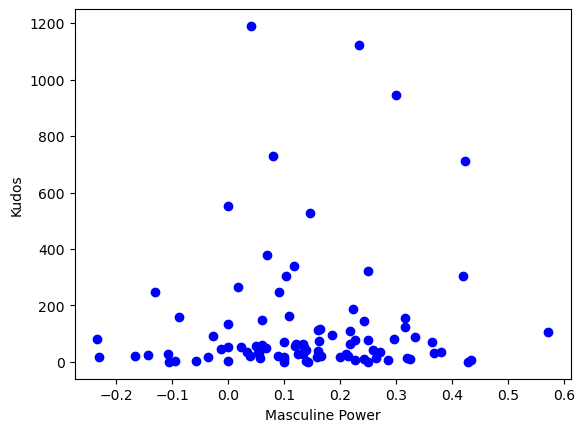

In [37]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
masc_power = df['masculine_power_score']
kudos = df['kudos']

plt.scatter(masc_power, kudos, c="b")
plt.xlabel("Masculine Power") # what you plot on the X axis
plt.ylabel("Kudos") # what you plot on the Y axis
plt.show()

**Q5. Multiple Regression and Analysis**

In [ ]:
# I left off here last time and saved the data frame in a csv file. 

In [9]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

import pandas as pd
import numpy as np
import statsmodels.api as sm # used for doing a OLS multiple regression

df = pd.read_csv('df.csv', index_col = 0)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
7,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


In [22]:
# setting up the variables
x = df[['masculine_power_score','published_year','words']] #explanatory variables
y = df['kudos'] #dependent variable #independent variables

x = sm.add_constant(x)
model = sm.OLS(y, x).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kudos   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.651
Date:                Tue, 12 Mar 2024   Prob (F-statistic):            0.00139
Time:                        12:01:09   Log-Likelihood:                -608.19
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.985e+04   1.75e+04      3.994      0.000    3.51e+04    1.05e+05
masculine_power_score    77.4713    145.484      0.533      0.596    -211.741     366.684
published_year          -34.3797      8.664     -3.968      0.000     -51.603     -17.157
words                    -0.3175      0.409     -0.777      0.439      -1.130       0.495
==============================================================================
Omnibus:                       73.204   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.665
Skew:                           2.737   Prob(JB):                     2.96e-84
Kurtosis:                      11.521   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

The models R-squared value is 0.165. This means that about 16.5 % of the variability in kudos given can be explained by the model.
R-squared values can range between 0 (meaning the model does not explain any variability of the dependent variable) and 1 (the model perfectly explains the variability in the dependent variable). Considering this, 16.5% is rather low on the end of explainability, which suggests there might be other factors at play that could explain the variability of kudos given better.

The adjusted R-squared value is 0.136. The adjusted R-squared value is a modified version of the R-squared value that takes into account the amount of predictors. As adding more explanatory variables can increase the r-squared value, looking at the adjusted R-squared value ensures that we don't overfit the mode by seeing how reliable the correlation is. With a value of 0.136 the adjusted value has a slight decrease from the R-squared value, which is normal.

In [ ]:
# Q6b (words): Interpret F-test result

The F-test determines if any of the explanatory/independent variables are significant. With a value of 5.651 the F-statistic is quite low. However, the Prob (F-statistic) value is 0.00139. A low value for this variable is important as it means that the test is significant.

In [ ]:
# Q6c (words): Interpret coefficients and t-test result

The linear regression coefficient tells you whether there is a positive or negative correlation between an independent variable and the explanatory variables. The linear regression p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. That means that when a p-value is below 0.05 we can reject the null hypothesis that there is no correlation with the dependent variable (kudos).

- masculine_power_score (77.4713): it is quite high which would mean there is a positive correlation. However, it is not significant as the p-value is 0.596, which is quite above the usual < 0.05 needed to reject the Null-hypothesis
- published_year (- 34.3797): This means this explanatory variable has a negative correlation with the dependent. As kudos, the dependent variable, increases the published year is lower. With a p-value of 0.000 this variable is quite significant for our regression model. Perhaps the negative correlation is because older stories have had more time to amass kudoes over the years or maybe there are less readers on the platform (these are just some ideas and cannot be deduced however from this result).
- words (-0.3175): Words have a slight negative correlation, however this is not significant as the p value is 0.439 is bigger than the usual 0.05.


####Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.###

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [47]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

from scipy import stats # needed for the shapiro-wilk test

data_points = ['kudos', 'words','masculine_power_score', 'published_year']
for value in data_points:
    statistics, p_val = stats.shapiro(df[value])
    if p_val < 0.05:
        print("Difference for", value,"is statistically significant as the p_val is:", p_val,"\nThis means we reject H0 and confirm H1. Data points for", value, "are not normally distributed.\n")
    else:
        print("Difference for", value,"is NOT statistically significant as the p_val is:", p_val, "\nThis means we reject H1, confirm H0. Data points for", value, "are normally distributed. \n")

Difference for kudos is statistically significant as the p_val is: 9.839955490231842e-15 
This means we reject H0 and confirm H1. Data points for kudos are not normally distributed.

Difference for words is statistically significant as the p_val is: 0.0025207288563251495 
This means we reject H0 and confirm H1. Data points for words are not normally distributed.

Difference for masculine_power_score is NOT statistically significant as the p_val is: 0.9494940638542175 
This means we reject H1, confirm H0. Data points for masculine_power_score are normally distributed. 

Difference for published_year is statistically significant as the p_val is: 3.464673881126146e-08 
This means we reject H0 and confirm H1. Data points for published_year are not normally distributed.



In [57]:
residuals = model.resid

In [55]:
# Q7b (words): Write your analysis for the Normality Test there:

As we can see in the printed results the only variable that is normally distributed is the masculine_power_score. This matches roughly with expectations before as we have already made histograms that indicated that the other variables are very likely not normally distributed. The Null-Hypothesis for the Shaprio Wilks test is that the data is normally distributed. Therefore, anything results above > 0.05 make use reject the alternative hypothesis and indicate normalcy.

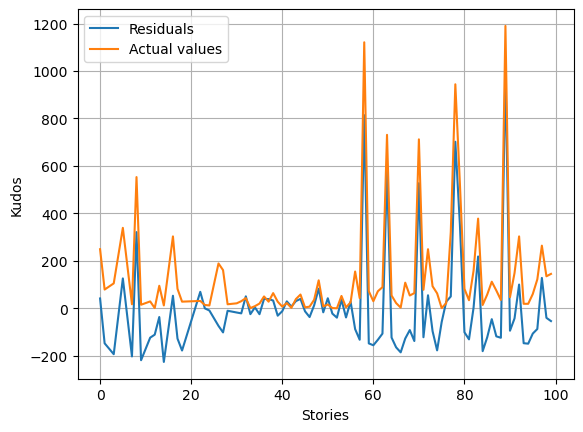

In [61]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

plt.plot(residuals, label ='Residuals')
plt.plot(df['kudos'], label ="Actual values")
plt.xlabel('Stories')
plt.ylabel('Kudos')
plt.grid(True)
legend = plt.legend()

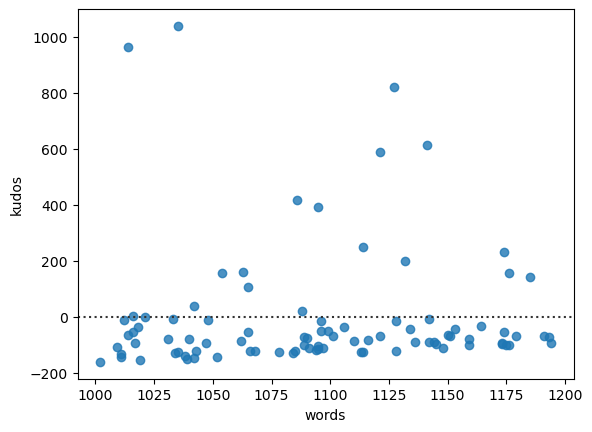

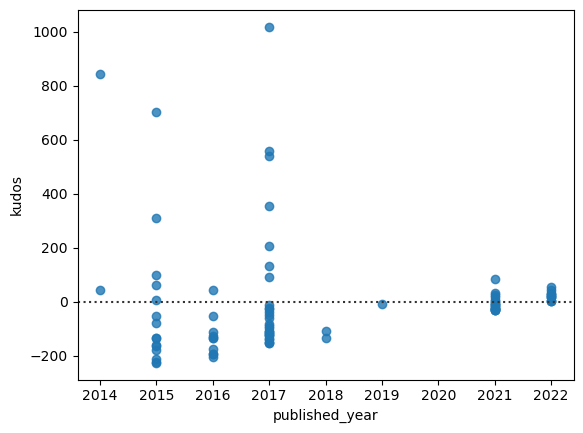

<Axes: xlabel='masculine_power_score', ylabel='kudos'>

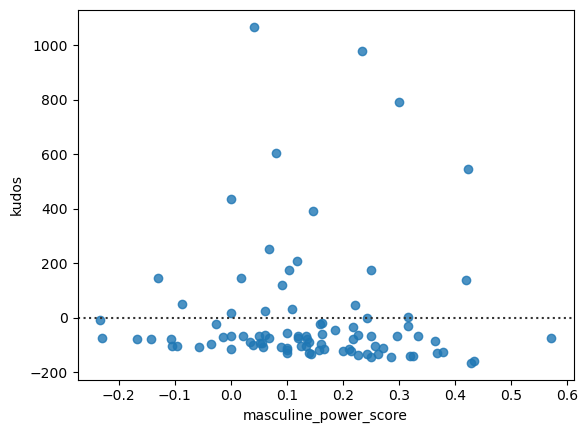

In [27]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

import seaborn as sns  

sns.residplot(x='words', y='kudos', data=df) 

plt.show() 


sns.residplot(x='published_year', y='kudos', data=df) 
plt.show() 


sns.residplot(x='masculine_power_score', y='kudos', data=df) 

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [62]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:

Homoscedasticity is one of the assumptions that must be fulfilled when doing linear regression. It means that the variance of residuals values are equally distributed and there is no clear pattern that suggests otherwise (heteroscedacity). Quite frankly, I have no idea if these plots are homoscedastic or heteroscedastic but it seems there isn't a clear pattern so I would say they are homoscedastic.

**Q8: Multicollinearity**

In [63]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set 
X = df[['masculine_power_score', 'words', 'published_year']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                 feature         VIF
0  masculine_power_score    1.815714
1                  words  397.170605
2         published_year  396.362547


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [1]:
# Q8b (words): Write your analysis for the multicollinearity test here:

We look for multicollinearity when we want to test if several independent variables are correlated. When they are correllated too much, then during our linear regression, we are not able to tell which variable of them has what effect precisely. With a VIF of 1.815 the masculine_power_score is the only variable of the three that is not correlated so we can measure it's covariance better. The very high number for words and published_year suggest that there may be an issue wand that these are highly correlated.

**Q9: Reflection**

In [2]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?

First, it's a bit strange that we compute lexical richness only to use the variable `words` later on for the OLS as suggested by the Methodology section. And improvement could be to use the lexical richness score we computed as originally indicated. 

Next time for computing the masculinity score, I would also bootstrap the spacy annotation process so we can get a more precise data for this variable.

Additonally, the R-squared value is quite low so we can only explain 16% of the variation in the dependent variable using our independent variables. This suggests that there may be other variables that could explain the variance better.

Lastly, I believe we can reject the null-hypothesis: "H0: Low levels of masculinity in male characters have no affect on fanfiction success when controlling for publication year and lexical richness." as there is an influence of low-level masculinity on the amount of kudos a story gets, even if it is relatively small predictor.


##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.